In [1]:
#Import Packages
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read data from dataset
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#No of rows and columns
df.shape

(5572, 2)

In [5]:
#Properties of data
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


### Exploratory Data Analysis and Data Preprocessing

In [6]:
#Checking if there are null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
#Checking if there are duplicate values
df.duplicated(keep = 'first').sum()

415

In [8]:
#Remove duplicate values
df.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df.shape

(5157, 2)

In [10]:
df.duplicated(keep = 'first').sum()

0

In [11]:
#Finding the unique values in the column - Category
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

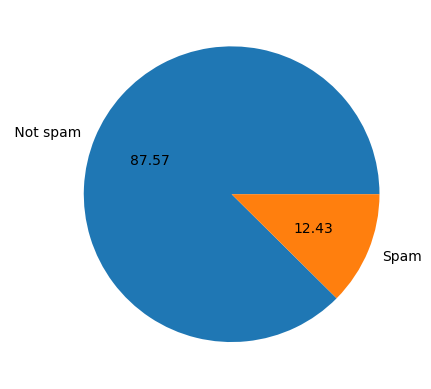

In [12]:
#Check the percentage of spam and ham emails
plt.pie(df['Category'].value_counts(),labels=[' Not spam','Spam'],autopct='%0.2f')
plt.show()

In [13]:
#Label enode the Category column
label_encoder = preprocessing.LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [14]:
df['Category'].unique()

array([0, 1])

### Splitting Data into Dependent and Independent variables

In [15]:
#Independent variable
x = df['Message']
#Dependent variable
y = df['Category']

### Train data and Test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#Text vectorization
vector = CountVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

### Model Building 

Naive Bayes Model

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [21]:
y_pred = nb_model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9903100775193798

Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr_model = LogisticRegression()
#Training the model
lr_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
#Prediction using the trained model
y_pred = lr_model.predict(x_test)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[907,   2],
       [ 16, 107]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9825581395348837

Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf_model.predict(x_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[909,   0],
       [ 29,  94]], dtype=int64)

In [32]:
#Accuracy score
accuracy_score(y_test, y_pred)

0.9718992248062015

Naive Bayes model was selected and testing with some examples

In [33]:
#Testing a Spam mail
test = ['Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app']

In [34]:
test = vector.transform(test)

In [35]:
result = nb_model.predict(test)

In [36]:
if result == 1:
    print('Spam mail')
else:
    print('Not spam mail')

Spam mail


In [40]:
#Testing a non spam mail
test2 = ['Sir, Waiting for your mail.']
test2 = vector.transform(test2)

In [41]:
result2 = nb_model.predict(test2)

In [42]:
if result2 == 0:
    print('Not spam mail')
else:
    print('Spam mail')

Not spam mail
